# Exploratory Data Analysis on the dataset about the numbers of air passengers traveling through SF airport.

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Import data

In [2]:
data = pd.read_csv("data/data.csv")

In [3]:
data.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd
0,19/06/2012,ORD,DFW,12.875000,12.331296,9.812647
1,10/09/2012,LAS,DEN,14.285714,10.775182,9.466734
2,05/10/2012,DEN,LAX,10.863636,11.083177,9.035883
3,09/10/2011,ATL,ORD,11.480000,11.169268,7.990202
4,21/02/2012,DEN,SFO,11.450000,11.269364,9.517159


In [4]:
len(data)

8902

## Data inspection

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DateOfDeparture   8902 non-null   object 
 1   Departure         8902 non-null   object 
 2   Arrival           8902 non-null   object 
 3   WeeksToDeparture  8902 non-null   float64
 4   log_PAX           8902 non-null   float64
 5   std_wtd           8902 non-null   float64
dtypes: float64(3), object(3)
memory usage: 417.4+ KB


In [6]:
# Null analysis
data.isnull().sum()

DateOfDeparture     0
Departure           0
Arrival             0
WeeksToDeparture    0
log_PAX             0
std_wtd             0
dtype: int64

In [7]:
data.describe().round(3)

,WeeksToDeparture,log_PAX,std_wtd
count,8902.000,8902.000,8902.000
mean,11.446,10.999,8.618
std,2.787,0.994,2.140
min,2.625,3.878,2.160
25%,9.524,10.427,7.090
50%,11.300,11.013,8.571
75%,13.240,11.593,10.141
max,23.163,14.008,15.862


## EDA

In [8]:
# Split the dates into days, months, and years
data["DateDay"] = data["DateOfDeparture"].str.slice(0, 2)
data["DateMonth"] = data["DateOfDeparture"].str.slice(3, 5)
data["DateYear"] = data["DateOfDeparture"].str.slice(6, 10)
data.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd,DateDay,DateMonth,DateYear
0,19/06/2012,ORD,DFW,12.875000,12.331296,9.812647,19,06,2012
1,10/09/2012,LAS,DEN,14.285714,10.775182,9.466734,10,09,2012
2,05/10/2012,DEN,LAX,10.863636,11.083177,9.035883,05,10,2012
3,09/10/2011,ATL,ORD,11.480000,11.169268,7.990202,09,10,2011
4,21/02/2012,DEN,SFO,11.450000,11.269364,9.517159,21,02,2012


## Analysis on the numbers of flights per Airports

In [9]:
depart_count = data.groupby("Departure").log_PAX.count()
depart_count

Departure
ATL     990
BOS     509
CLT     161
DEN     640
DFW     648
DTW     228
EWR     410
IAH     140
JFK     364
LAS     419
LAX     758
LGA     466
MCO     202
MIA     233
MSP     230
ORD    1038
PHL     354
PHX     139
SEA     280
SFO     693
Name: log_PAX, dtype: int64

Text(0.5, 1.0, 'Number of flights per departure airport')

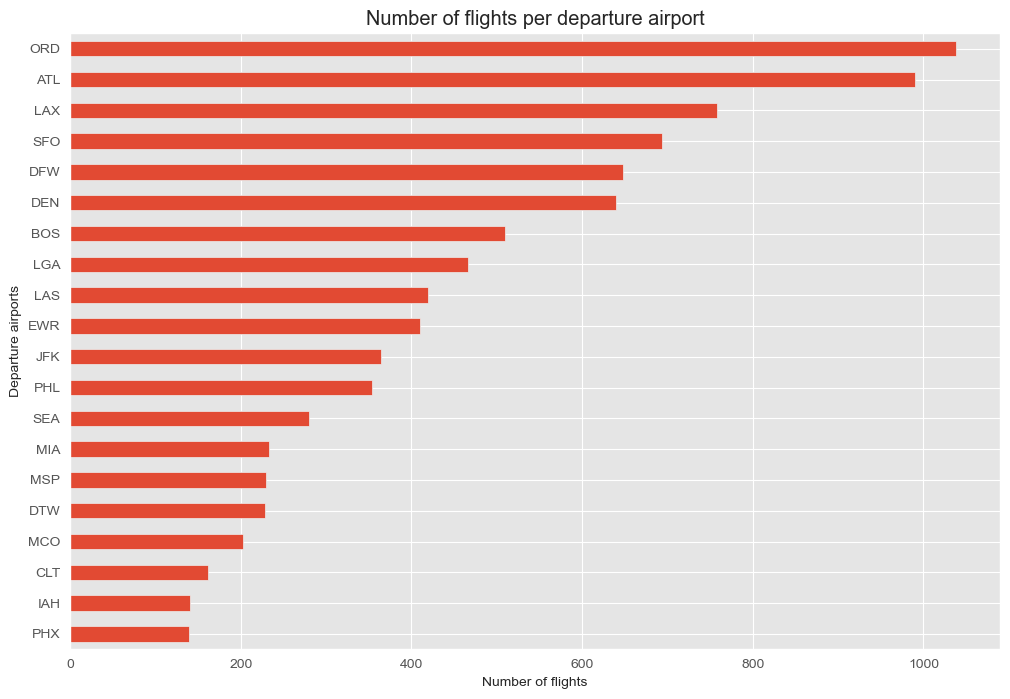

In [10]:
# Set figure theme
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
depart_count.sort_values(ascending=True).plot(kind='barh')
plt.xlabel("Number of flights")
plt.ylabel("Departure airports")
plt.title("Number of flights per departure airport")

In [11]:
arr_count = data.groupby("Arrival").log_PAX.count()
arr_count

Arrival
ATL    1000
BOS     578
CLT     139
DEN     615
DFW     558
DTW     195
EWR     413
IAH     141
JFK     292
LAS     436
LAX     764
LGA     496
MCO     287
MIA     213
MSP     207
ORD    1101
PHL     365
PHX     137
SEA     273
SFO     692
Name: log_PAX, dtype: int64

Text(0.5, 1.0, 'Number of flights per arrival airport')

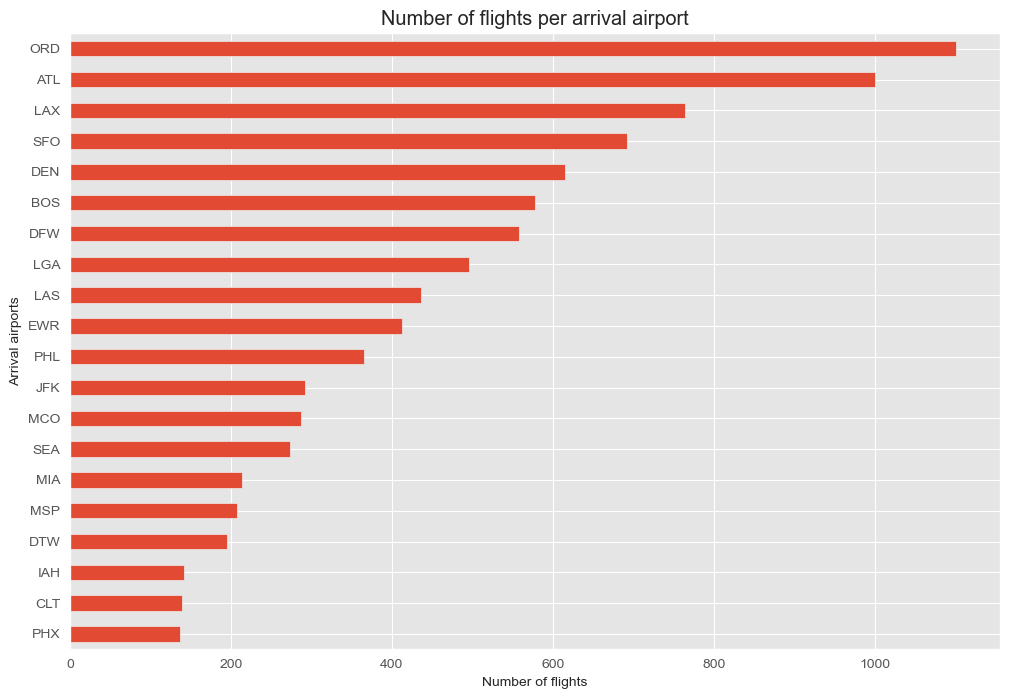

In [12]:
plt.figure(figsize=(12, 8))
arr_count.sort_values(ascending=True).plot(kind='barh')
plt.xlabel("Number of flights")
plt.ylabel("Arrival airports")
plt.title("Number of flights per arrival airport")

## Analysis on the numbers of flights per dates

In [13]:
day_f_count = data.groupby("DateDay").log_PAX.count()
day_f_count

DateDay
01    316
02    299
03    322
04    328
05    328
06    305
07    313
08    260
09    271
10    288
11    280
12    307
13    285
14    257
15    274
16    289
17    289
18    291
19    299
20    300
21    300
22    321
23    256
24    276
25    292
26    271
27    285
28    311
29    273
30    264
31    152
Name: log_PAX, dtype: int64

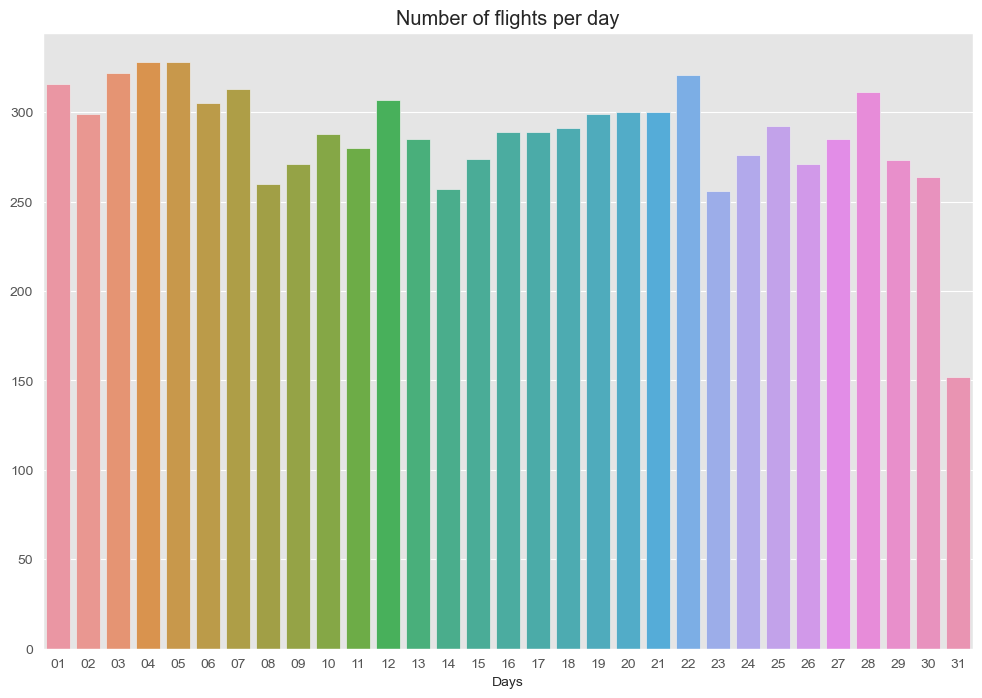

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(x=day_f_count.index, y=day_f_count.values)
plt.xlabel("Days")
plt.title("Number of flights per day")
plt.show()

In [15]:
m_f_count = data.groupby("DateMonth").log_PAX.count()
m_f_count

DateMonth
01    1007
02     852
03     602
04     528
05     459
06     483
07     507
08     484
09     975
10    1003
11    1001
12    1001
Name: log_PAX, dtype: int64

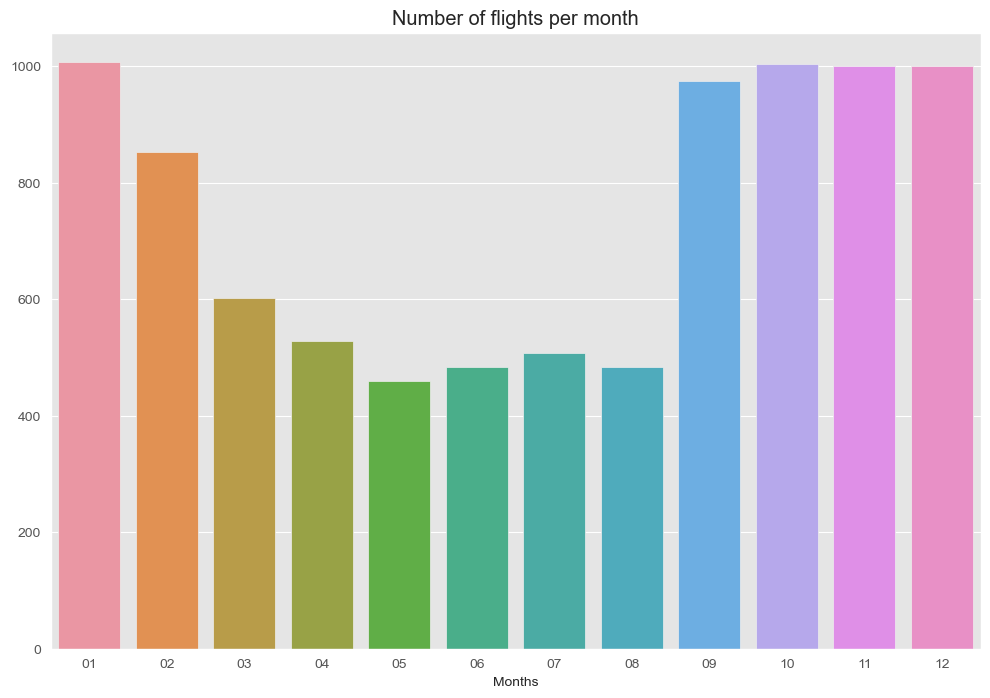

In [16]:
plt.figure(figsize=(12, 8))
sns.barplot(x=m_f_count.index, y=m_f_count.values)
plt.xlabel("Months")
plt.title("Number of flights per month")
plt.show()

In [17]:
year_f_count = data.groupby("DateYear").log_PAX.count()
year_f_count

DateYear
2011    2033
2012    5868
2013    1001
Name: log_PAX, dtype: int64

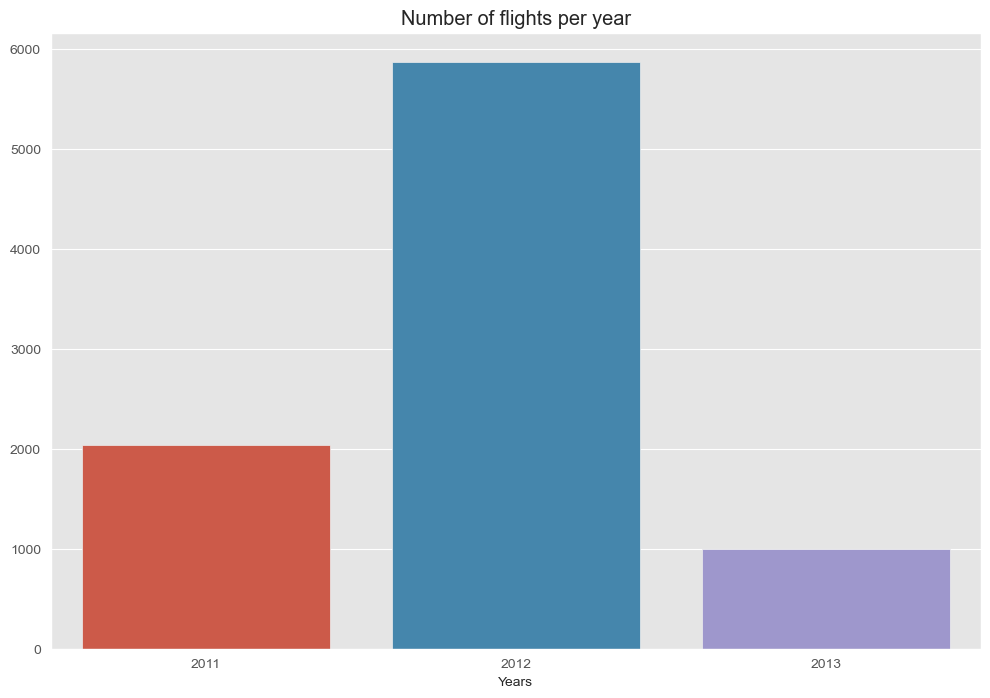

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(x=year_f_count.index, y=year_f_count.values)
plt.xlabel("Years")
plt.title("Number of flights per year")
plt.show()

## Analysis on the numerical columns

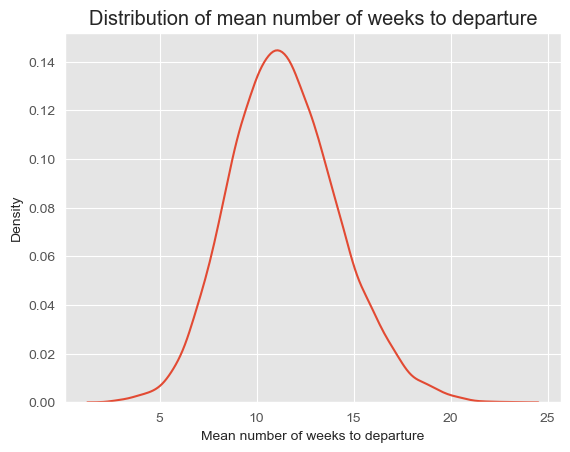

In [19]:
sns.kdeplot(data=data, x="WeeksToDeparture")
plt.xlabel("Mean number of weeks to departure")
plt.title("Distribution of mean number of weeks to departure")
plt.show()

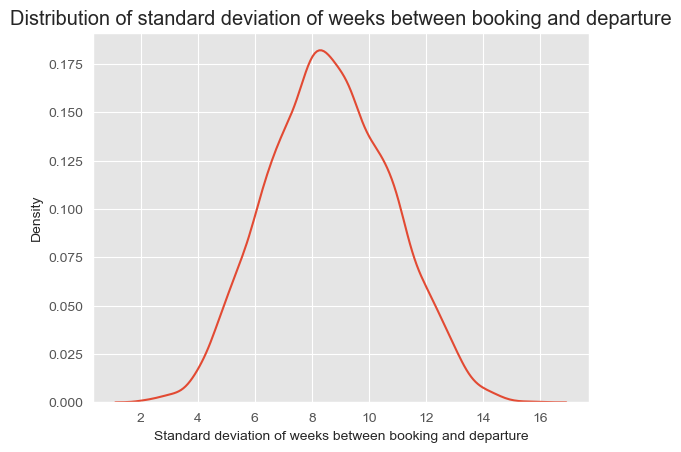

In [20]:
sns.kdeplot(data=data, x="std_wtd")
plt.xlabel("Standard deviation of weeks between booking and departure")
plt.title("Distribution of standard deviation of weeks between booking and departure")
plt.show()

In [21]:
data_add = pd.read_csv("data/external_data.csv")
data_add.head()

,Date,AirPort,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2011-09-01,ATL,35,29,24,21,18,14,79,56,...,16,16,11,19,6,26.0,0.00,3,NaN,129
1,2011-09-02,ATL,36,29,22,17,15,14,61,46,...,16,16,16,24,7,34.0,0.00,2,NaN,185
2,2011-09-03,ATL,35,29,23,17,16,14,64,47,...,16,16,16,19,7,26.0,0.00,4,NaN,147
3,2011-09-04,ATL,27,24,22,22,19,16,93,72,...,16,14,4,21,9,26.0,6.10,6,Rain,139
4,2011-09-05,ATL,26,24,22,23,22,20,94,91,...,16,13,3,32,16,45.0,16.00,8,Rain-Thunderstorm,149


In [22]:
new_formated = []
for i in data_add['Date']:
    new_formated.append(datetime.strptime(i, '%Y-%m-%d').strftime('%d/%m/%Y'))
data_add['Date'] = pd.DataFrame(new_formated)
data_add.head()

,Date,AirPort,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,01/09/2011,ATL,35,29,24,21,18,14,79,56,...,16,16,11,19,6,26.0,0.00,3,NaN,129
1,02/09/2011,ATL,36,29,22,17,15,14,61,46,...,16,16,16,24,7,34.0,0.00,2,NaN,185
2,03/09/2011,ATL,35,29,23,17,16,14,64,47,...,16,16,16,19,7,26.0,0.00,4,NaN,147
3,04/09/2011,ATL,27,24,22,22,19,16,93,72,...,16,14,4,21,9,26.0,6.10,6,Rain,139
4,05/09/2011,ATL,26,24,22,23,22,20,94,91,...,16,13,3,32,16,45.0,16.00,8,Rain-Thunderstorm,149


In [23]:
merged_df = pd.merge(data, data_add, left_on=["DateOfDeparture", "Departure"], right_on=["Date", "AirPort"])
merged_df.sample(10)

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd,DateDay,DateMonth,DateYear,Date,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
6683,12/04/2012,ORD,IAH,11.350000,11.251560,8.803558,12,04,2012,12/04/2012,...,16,16,16,26,8,32.0,0.00,2,NaN,142
6482,28/01/2013,DFW,LAS,9.105263,12.336303,5.801290,28,01,2013,28/01/2013,...,16,16,11,50,28,66.0,T,7,NaN,174
4079,05/12/2012,JFK,LAX,17.250000,13.373533,11.667721,05,12,2012,05/12/2012,...,16,16,11,53,28,66.0,T,5,NaN,302
4783,05/04/2012,ORD,MSP,9.705882,11.914512,8.221654,05,04,2012,05/04/2012,...,16,16,16,37,25,53.0,0.00,4,NaN,33
7708,08/10/2011,JFK,MCO,15.354839,10.252085,9.593569,08,10,2011,08/10/2011,...,16,16,16,23,13,26.0,0.00,0,NaN,241
6742,19/04/2012,ORD,IAH,10.300000,11.141010,7.211832,19,04,2012,19/04/2012,...,16,16,16,29,15,42.0,T,7,NaN,57
6610,14/03/2012,SEA,ORD,9.157895,10.535200,5.927930,14,03,2012,14/03/2012,...,16,15,8,34,17,48.0,8.64,8,Rain,140
4339,03/02/2013,ATL,MIA,11.875000,9.909000,8.754192,03,02,2013,03/02/2013,...,16,15,8,42,18,56.0,0.00,1,Fog,288
2580,05/11/2012,ATL,MCO,11.454545,11.967050,10.271214,05,11,2012,05/11/2012,...,16,16,14,23,8,26.0,0.25,4,Rain,11
4707,26/11/2012,LAS,SFO,11.086957,10.631189,8.748574,26,11,2012,26/11/2012,...,16,16,16,21,9,23.0,0.00,1,NaN,201


In [24]:
data_to_output = merged_df.drop(["AirPort", "Date"], axis=1)

## Output into files for building models

In [25]:
# For building baseline models
data.to_csv("data/data_cleaned.csv")
data_to_output.to_csv("data/data_merged.csv")